In [1]:
clear all
format compact
imatlab_export_fig('print-svg')  % Static svg figures.

In [2]:
Cap = 1; L = 1; R = 1;

In [3]:
A = [0 -1/Cap; 1/L -R/L];
B = [1/Cap; 0];
C = [1 0; 0 1; 1 -R; 0 R; 0 -1];
D = [0; 0; 0; 0; 1];
circ_ss = ss(A, B, C, D, ...
'statename',{'v31' 'i1'}, ...
'inputname', 'u', ...
'outputname', {'v31' 'i1' 'v32' 'v21' 'i2'});

In [4]:
circ_ss


circ_ss =


  A = 


        v31   i1
   v31    0   -1
   i1     1   -1


  B = 


        u
   v31  1
   i1   0


  C = 


        v31   i1
   v31    1    0
   i1     0    1
   v32    1   -1
   v21    0    1
   i2     0   -1


  D = 


        u
   v31  0
   i1   0
   v32  0
   v21  0
   i2   1


Continuous-time state-space model.



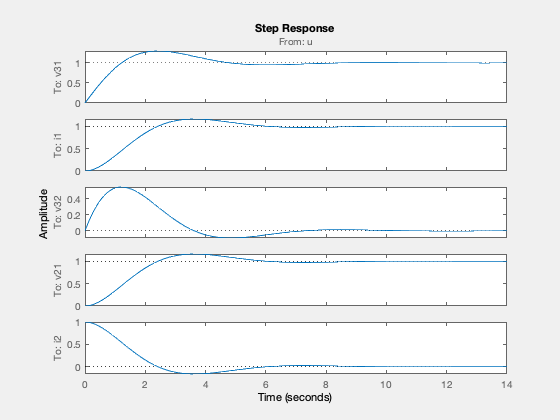

In [5]:
step(circ_ss)

In [6]:
circ_tf = tf(circ_ss)


circ_tf =


  From input "u" to output...


            s + 1


   v31:  -----------


         s^2 + s + 1


             1


   i1:  -----------


        s^2 + s + 1


         s - 3.14e-16


   v32:  ------------


         s^2 + s + 1


              1


   v21:  -----------


         s^2 + s + 1


        s^2 + s + 3.13e-16


   i2:  ------------------


           s^2 + s + 1


Continuous-time transfer function.



In [7]:
circ_zpk=zpk(circ_ss)


circ_zpk =


  From input "u" to output...


             (s+1)


   v31:  -------------


         (s^2 + s + 1)
 


              1


   i1:  -------------


        (s^2 + s + 1)


               s


   v32:  -------------


         (s^2 + s + 1)


               1


   v21:  -------------


         (s^2 + s + 1)


           s (s+1)


   i2:  -------------


        (s^2 + s + 1)


Continuous-time zero/pole/gain model.



In [8]:
syms phi t s
phi = inv(s*eye(2) - A)

phi =


[(s + 1)/(s^2 + s + 1), -1/(s^2 + s + 1)]


[      1/(s^2 + s + 1),  s/(s^2 + s + 1)]


In [9]:
G = C*phi*B + D

G =


                  (s + 1)/(s^2 + s + 1)


                        1/(s^2 + s + 1)


(s + 1)/(s^2 + s + 1) - 1/(s^2 + s + 1)


                        1/(s^2 + s + 1)


                    1 - 1/(s^2 + s + 1)


In [10]:
G = simplify(G)

G =


(s + 1)/(s^2 + s + 1)


      1/(s^2 + s + 1)


      s/(s^2 + s + 1)


      1/(s^2 + s + 1)


  1 - 1/(s^2 + s + 1)


In [11]:
pretty(G)

/      s + 1     \
|   ----------   |
|    2           |
|   s  + s + 1   |
|                |
|        1       |
|   ----------   |
|    2           |
|   s  + s + 1   |
|                |
|        s       |
|   ----------   |
|    2           |
|   s  + s + 1   |
|                |
|        1       |
|   ----------   |
|    2           |
|   s  + s + 1   |
|                |
|          1     |
| 1 - ---------- |
|      2         |
\     s  + s + 1 /

